In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = "Resources/Seasons_Stats.csv"
stats_pd = pd.read_csv(data_file)
stats_pd.head(2)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0


In [3]:
stats_pd.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
data_file2 = "Resources/Players.csv"
players_pd = pd.read_csv(data_file2)
players_pd.head(2)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [5]:
join = pd.merge(stats_pd, players_pd, on="Player")
join.tail(2)

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,40.0,78.0,240.0,3920,203.0,97.0,NaN,1994.0,Heidelberg,Germany
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,30.0,66.0,284.0,3921,216.0,120.0,NaN,1997.0,Mostar,Bosnia and Herzegovina


In [6]:
join_df = join[["Year","Player", "Pos", "Age", "height", "weight", "Tm", "G", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", \
                "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "TRB", "PF", "PTS", "MP", "birth_state"]]
join_df.head()

,Year,Player,Pos,Age,height,weight,Tm,G,FG,FGA,...,2P%,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,FTW,63.0,144.0,516.0,...,0.279,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,FTW,38.0,72.0,232.0,...,0.310,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN
2,1950.0,Cliff Barker,SG,29.0,188.0,83.0,INO,49.0,102.0,274.0,...,0.372,0.372,75.0,106.0,0.708,NaN,99.0,279.0,NaN,Indiana
3,1951.0,Cliff Barker,SG,30.0,188.0,83.0,INO,56.0,51.0,202.0,...,0.252,0.252,50.0,77.0,0.649,100.0,98.0,152.0,NaN,Indiana
4,1952.0,Cliff Barker,SG,31.0,188.0,83.0,INO,44.0,48.0,161.0,...,0.298,0.298,30.0,51.0,0.588,81.0,56.0,126.0,494.0,Indiana


In [7]:
position_df = join_df
position_df.head(2)

,Year,Player,Pos,Age,height,weight,Tm,G,FG,FGA,...,2P%,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,FTW,63.0,144.0,516.0,...,0.279,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,FTW,38.0,72.0,232.0,...,0.310,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN


In [8]:
position = position_df["Pos"]

In [9]:
position_df["Position"] = position

C:\Users\airma\Miniconda3\envs\PythonWebMongo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
position_df.head()

,Year,Player,Pos,Age,height,weight,Tm,G,FG,FGA,...,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state,Position
0,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,FTW,63.0,144.0,516.0,...,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN,G-F
1,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,FTW,38.0,72.0,232.0,...,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN,G-F
2,1950.0,Cliff Barker,SG,29.0,188.0,83.0,INO,49.0,102.0,274.0,...,0.372,75.0,106.0,0.708,NaN,99.0,279.0,NaN,Indiana,SG
3,1951.0,Cliff Barker,SG,30.0,188.0,83.0,INO,56.0,51.0,202.0,...,0.252,50.0,77.0,0.649,100.0,98.0,152.0,NaN,Indiana,SG
4,1952.0,Cliff Barker,SG,31.0,188.0,83.0,INO,44.0,48.0,161.0,...,0.298,30.0,51.0,0.588,81.0,56.0,126.0,494.0,Indiana,SG


In [11]:
position_df['Position'] = position_df['Position'].replace({'G-F': 'G', 'SG': 'G', 'SF':'F', 'F-G':'F', 'F-C': 'F', \
                                                          'PG':'G', 'PF':'F', 'C-F':'C', 'SF-SG':'F', 'PF-C':'F', \
                                                          'C-PF':'C', 'SG-SF':'G', 'PF-SF':'F', 'SF-PF':'F', \
                                                          'SG-PG':'G', 'SF-PG':'F', 'C-SF':'C', 'SG-PF':'G', \
                                                           'PG-SG':'G', 'PG-SF':'G'})

C:\Users\airma\Miniconda3\envs\PythonWebMongo\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
position_df["Position"].value_counts()

F    10033
G     9762
C     4829
Name: Position, dtype: int64

In [ ]:
position_df.columns

In [13]:
position_df = position_df[["Position", "Year", "Player", "Pos", "Age", "height", "weight", "G", "MP", "FG",  "FGA", "FG%",\
                          "PTS", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "TRB", "PF"]]
position_df.head()

,Position,Year,Player,Pos,Age,height,weight,G,MP,FG,...,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,TRB,PF
0,G,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,63.0,NaN,144.0,...,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,217.0
1,G,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,38.0,NaN,72.0,...,NaN,72.0,232.0,0.310,0.310,58.0,90.0,0.644,89.0,97.0
2,G,1950.0,Cliff Barker,SG,29.0,188.0,83.0,49.0,NaN,102.0,...,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,99.0
3,G,1951.0,Cliff Barker,SG,30.0,188.0,83.0,56.0,NaN,51.0,...,NaN,51.0,202.0,0.252,0.252,50.0,77.0,0.649,100.0,98.0
4,G,1952.0,Cliff Barker,SG,31.0,188.0,83.0,44.0,494.0,48.0,...,NaN,48.0,161.0,0.298,0.298,30.0,51.0,0.588,81.0,56.0


In [14]:
position_yr = position_df.groupby(["Position", "Year"], as_index=False)
position_yr.mean().head(2)

,Position,Year,Age,height,weight,G,MP,FG,FGA,FG%,...,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,TRB,PF
0,C,1950.0,26.294118,203.725490,98.627451,42.823529,NaN,127.117647,358.235294,0.319706,...,NaN,127.117647,358.235294,0.319706,0.319706,118.137255,167.921569,0.661146,NaN,134.372549
1,C,1951.0,26.483871,205.387097,100.193548,43.838710,NaN,163.516129,433.677419,0.332452,...,NaN,163.516129,433.677419,0.332452,0.332452,139.741935,189.451613,0.712871,302.0,155.290323


In [15]:
position_points_yr_df = pd.DataFrame(position_yr["PTS"].mean())
position_points_yr_df.head(2)

,Position,Year,PTS
0,C,1950.0,372.372549
1,C,1951.0,466.774194


In [16]:
position_points_yr_C = position_points_yr_df.loc[ position_points_yr_df["Position"] == "C", :]
position_points_yr_C.head(2)

,Position,Year,PTS
0,C,1950.0,372.372549
1,C,1951.0,466.774194


In [17]:
year_v = []
points_c = []

for i in range(len(position_points_yr_C)):
    year_n = position_points_yr_C["Year"][i]
    points_n = position_points_yr_C["PTS"][i]
    
    year_v.append(year_n)
    points_c.append(points_n)

In [ ]:
position_points_yr_F = position_points_yr_df.loc[ position_points_yr_df["Position"] == "F", :]
position_points_yr_F.reset_index(inplace=True)
position_points_yr_F.head(2)

In [ ]:
year_vf = []
points_f = []

for i in range(len(position_points_yr_F)):
    year_nf = position_points_yr_F["Year"][i]
    points_nf = position_points_yr_F["PTS"][i]
    
    year_vf.append(year_nf)
    points_f.append(points_nf)

In [ ]:
position_points_yr_G = position_points_yr_df.loc[ position_points_yr_df["Position"] == "G", :]
position_points_yr_G.reset_index(inplace=True)
position_points_yr_G.head(2)

In [ ]:
year_vg = []
points_g = []

for i in range(len(position_points_yr_G)):
    year_ng = position_points_yr_G["Year"][i]
    points_ng = position_points_yr_G["PTS"][i]
    
    year_vg.append(year_ng)
    points_g.append(points_ng)

In [ ]:
x_axis = year_v
center, = plt.plot(x_axis, points_c, label = "Center")
forward, = plt.plot(x_axis, points_f, label = "Forward")
guard, = plt.plot(x_axis, points_g, label = "Guard")
plt.ylabel("Points")
plt.title("Average Player Points by Position")
plt.grid()
plt.legend(handles=[center, forward, guard], loc="best")
plt.savefig("Images/Points_by_Position")
plt.show()

In [ ]:
position_minutes_yr_df = pd.DataFrame(position_yr["MP"].mean())
position_minutes_yr_df.head()

In [ ]:
position_height_yr_df = pd.DataFrame(position_yr["height"].mean())
position_height_yr_df.head()

analysis and graphs for points per player per season

In [18]:
yearly_df = join_df.groupby("Year", as_index=False)

In [19]:
yearly_mean = yearly_df[["Age", "height", "weight", "G", "PTS", "3P", "2P", "FT", "3P%", "2P%", "FT%", "eFG%", "PF", "MP"]].mean()
yearly_mean.head(3)

,Year,Age,height,weight,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF,MP
0,1950.0,26.131410,191.926282,86.884615,42.884615,331.929487,NaN,116.782051,98.365385,NaN,0.318109,0.683685,0.318109,114.990385,NaN
1,1951.0,26.344828,193.224138,88.068966,43.890805,375.505747,NaN,133.419540,108.666667,NaN,0.332741,0.701023,0.332741,123.494253,NaN
2,1952.0,26.130769,193.292308,88.292308,49.415385,446.892308,NaN,157.892308,131.107692,NaN,0.344500,0.691977,0.344500,144.523077,1294.792308


In [ ]:
yearly_mean.tail(3)

In [21]:
year_v = []
age_v = []
height_v = []
weight_v = []
G_v = []
PTS_v = []
P2_v = []
P3_v = []
FT_v = []
P2p_v = []
P3p_v = []
FTp_v = []
eFGp_v = []
PF_v = []
MP_v = []

for i in range(len(yearly_mean)):
    year_n = yearly_mean["Year"][i]
    age_n = yearly_mean["Age"][i]
    height_n = yearly_mean["height"][i]
    weight_n = yearly_mean["weight"][i]
    G_n = yearly_mean["G"][i]
    PTS_n = yearly_mean["PTS"][i]
    P2_n = yearly_mean["2P"][i]
    P3_n = yearly_mean["3P"][i]
    FT_n = yearly_mean["FT"][i]
    P2p_n = yearly_mean["2P%"][i]
    P3p_n = yearly_mean["3P%"][i]
    FTp_n = yearly_mean["FT%"][i]
    eFGp_n = yearly_mean["eFG%"][i]
    PF_n = yearly_mean["PF"][i]
    MP_n = yearly_mean["MP"][i]
    
    year_v.append(year_n)
    age_v.append(age_n)
    height_v.append(height_n)
    weight_v.append(weight_n)
    G_v.append(G_n)
    PTS_v.append(PTS_n)
    P2_v.append(P2_n)
    P3_v.append(P3_n)
    FT_v.append(FT_n)
    P2p_v.append(P2p_n)
    P3p_v.append(P3p_n)
    FTp_v.append(FT_n)
    eFGp_v.append(eFGp_n)
    PF_v.append(PF_n)
    MP_v.append(MP_n)

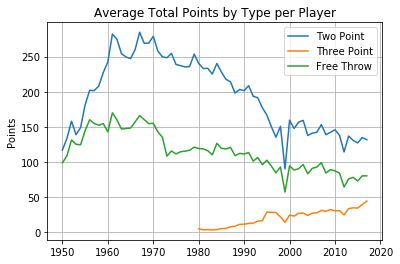

In [22]:
x_axis = year_v
two_points, = plt.plot(x_axis, P2_v, label = "Two Point")
three_points, = plt.plot(x_axis, P3_v, label = "Three Point")
free_throw, = plt.plot(x_axis, FT_v, label = "Free Throw")
plt.ylabel("Points")
plt.title("Average Total Points by Type per Player")
plt.grid()
plt.legend(handles=[two_points, three_points, free_throw], loc="best")
plt.savefig("Images/Avg_Yearly_Pts")
plt.show()

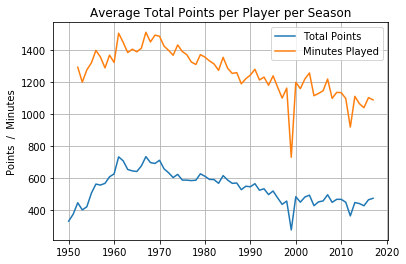

In [23]:
x_axis = year_v
tot_points, = plt.plot(x_axis, PTS_v, label = "Total Points")
min_played, = plt.plot(x_axis, MP_v, label = "Minutes Played")
#games_played, = plt.plot(x_axis, G_v, label = "Games Played")
plt.ylabel("Points  /  Minutes")
plt.title("Average Total Points per Player per Season")
plt.grid()
plt.legend(handles=[tot_points, min_played], loc="best")
plt.savefig("Images/Min_Played_vs_Total_Pts")
plt.show()

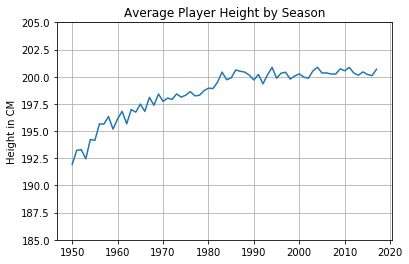

In [34]:
x_axis = year_v
height, = plt.plot(x_axis, height_v, label = "Average Height")

plt.ylabel("Height in CM")
plt.title("Average Player Height by Season")
plt.grid()
plt.ylim(185, 205)
#plt.legend(handles=[height], loc="best")
plt.savefig("Images/Avg_Player_Height")
plt.show()

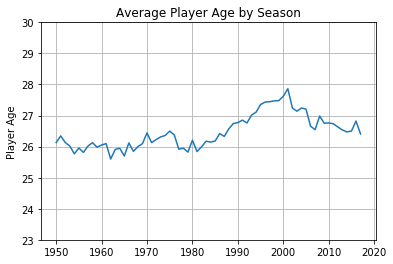

In [33]:
x_axis = year_v
age, = plt.plot(x_axis, age_v, label = "Average Age")

plt.ylabel("Player Age")
plt.title("Average Player Age by Season")
plt.grid()
plt.ylim(23, 30)
#plt.legend(handles=[height], loc="best")
plt.savefig("Images/Avg_Player_Age")
plt.show()

Code to create .csv and .html files from the 'yearly_mean' dataframe

In [ ]:
yearly_mean.to_csv("points_by_season.csv", index=False)

In [ ]:
yearly_mean.to_html('points_by_season.html', index=False)